# A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units.A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

In [47]:
# Step 1: Import necessary libraries
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [48]:
# Step 2: Load the data
file_path = "C:\\Users\\chakri\\Downloads\\Cutlets.csv"
df = pd.read_csv(file_path)

In [49]:
# Step 3: Explore the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [50]:
# Step 4: Descriptive statistics
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [51]:
# Step 5: Extract diameter data
diameters_UnitA = df['Unit A']
diameters_UnitB = df['Unit B']

In [52]:
# Step 6: Check for normality using Shapiro-Wilk test
p_value_unitA = stats.shapiro(diameters_UnitA).pvalue
p_value_unitB = stats.shapiro(diameters_UnitB).pvalue

print(f"Shapiro-Wilk p-value for Unit A: {p_value_unitA}")
print(f"Shapiro-Wilk p-value for Unit B: {p_value_unitB}")

Shapiro-Wilk p-value for Unit A: 0.31998491287231445
Shapiro-Wilk p-value for Unit B: 0.5225146412849426


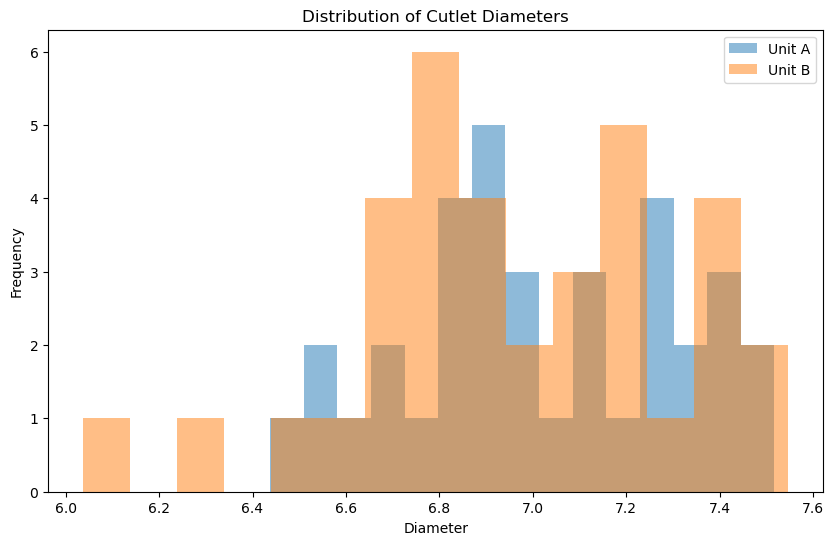

In [53]:
# Step 7: Visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Unit A'], alpha=0.5, label='Unit A', bins=15)
plt.hist(df['Unit B'], alpha=0.5, label='Unit B', bins=15)
plt.title('Distribution of Cutlet Diameters')
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [55]:
# Step 8: Check for homogeneity of variances using Levene's test
p_value_levene = stats.levene(diameters_UnitA, diameters_UnitB).pvalue
print(f"Levene's test p-value: {p_value_levene}")


Levene's test p-value: 0.4176162212502553


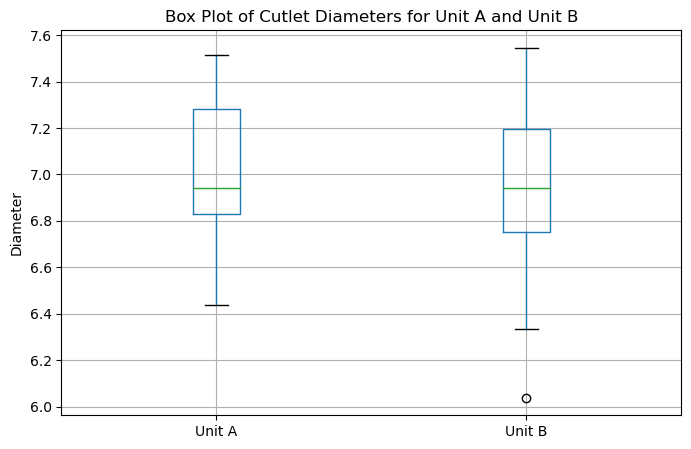

In [56]:
# Step 9: Visualize the data using box plot
plt.figure(figsize=(8, 5))
df.boxplot(column=['Unit A', 'Unit B'])
plt.title('Box Plot of Cutlet Diameters for Unit A and Unit B')
plt.ylabel('Diameter')
plt.show()

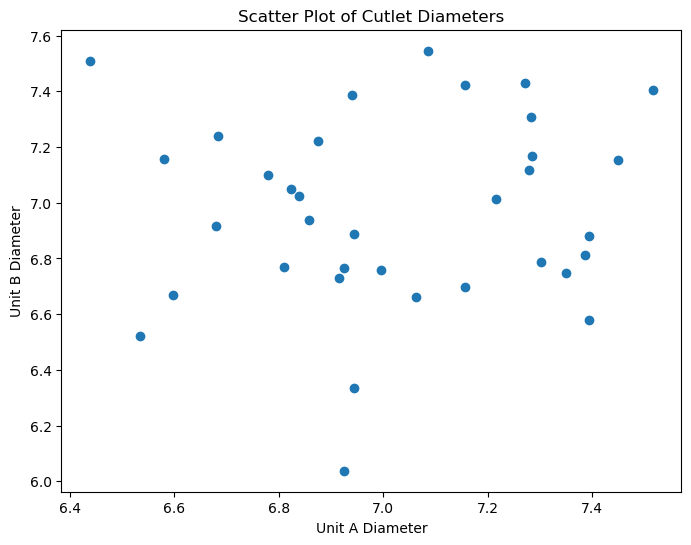

In [57]:
# Step 10: Visualize the data using scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Unit A'], df['Unit B'])
plt.title('Scatter Plot of Cutlet Diameters')
plt.xlabel('Unit A Diameter')
plt.ylabel('Unit B Diameter')
plt.show()

In [58]:
# Step 11: Perform t-test
p_value_ttest = stats.ttest_ind(diameters_UnitA, diameters_UnitB).pvalue
print(f"T-test p-value: {p_value_ttest}")


T-test p-value: 0.4722394724599501


In [59]:
# Step 12: Interpret the results
if p_value_ttest < 0.05:
    print("Reject the null hypothesis. There is a significant difference in diameter of cutlets between two units.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in diameter of cutlets between two units.")

Fail to reject the null hypothesis. There is no significant difference in diameter of cutlets between two units.


# A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [38]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [39]:
# Step 2: Load the data
file_path = "C:\\Users\\chakri\\Downloads\\LabTAT.csv"
df = pd.read_csv(file_path)

In [40]:
# Step 3: Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB
None


In [41]:
# Step 4: Display the first few rows of the dataset
print(df.head(10))

   Laboratory 1  Laboratory 2  Laboratory 3  Laboratory 4
0        185.35        165.53        176.70        166.13
1        170.49        185.91        198.45        160.79
2        192.77        194.92        201.23        185.18
3        177.33        183.00        199.61        176.42
4        193.41        169.57        204.63        152.60
5        179.45        197.00        181.51        161.12
6        191.37        166.36        214.21        154.02
7        166.81        169.60        183.43        163.25
8        158.81        175.36        191.60        152.79
9        165.88        198.68        208.43        161.98


In [42]:
# Step 5: Descriptive Statistics
descriptive_stats = df[['Laboratory 1', 'Laboratory 2', 'Laboratory 3', 'Laboratory 4']].describe()
print(descriptive_stats)

       Laboratory 1  Laboratory 2  Laboratory 3  Laboratory 4
count    120.000000    120.000000    120.000000     120.00000
mean     178.361583    178.902917    199.913250     163.68275
std       13.173594     14.957114     16.539033      15.08508
min      138.300000    140.550000    159.690000     124.06000
25%      170.335000    168.025000    188.232500     154.05000
50%      178.530000    178.870000    199.805000     164.42500
75%      186.535000    189.112500    211.332500     172.88250
max      216.390000    217.860000    238.700000     205.18000


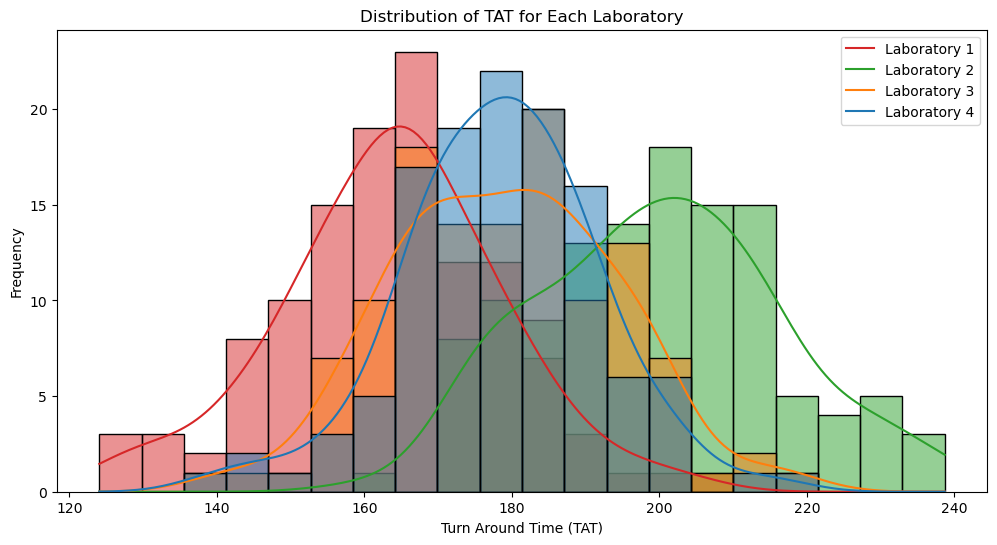

In [43]:
# Step 6: Distribution Plot
plt.figure(figsize=(12, 6))
sns.histplot(data=df[['Laboratory 1', 'Laboratory 2', 'Laboratory 3', 'Laboratory 4']], kde=True, bins=20)
plt.title('Distribution of TAT for Each Laboratory')
plt.xlabel('Turn Around Time (TAT)')
plt.ylabel('Frequency')
plt.legend(['Laboratory 1', 'Laboratory 2', 'Laboratory 3', 'Laboratory 4'])
plt.show()

In [44]:
# Step 7: One-way ANOVA Test
f_statistic, p_value = stats.f_oneway(df['Laboratory 1'], df['Laboratory 2'], df['Laboratory 3'], df['Laboratory 4'])
print(f"ANOVA F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

ANOVA F-Statistic: 118.70421654401437
P-Value: 2.1156708949992414e-57


In [45]:
# Step 8: Interpret ANOVA Results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in average TAT among the laboratories.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average TAT among the laboratories.")

Reject the null hypothesis. There is a significant difference in average TAT among the laboratories.


# Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

In [67]:
# Step 1: Import necessary libraries
from scipy.stats.contingency import chi2_contingency

In [68]:
# Step 2: Create the contingency table
data = [[50, 142, 131, 70], [550, 351, 480, 350]]


In [69]:
# Step 3: Perform the Chi-square test
stats, p, dof, expected = chi2_contingency(data)
print(f"Chi-square statistic: {stats}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 80.27295426602495
P-value: 2.682172557281901e-17
Degrees of freedom: 3
Expected frequencies:
[[111.01694915  91.21892655 113.05225989  77.71186441]
 [488.98305085 401.78107345 497.94774011 342.28813559]]


In [70]:
# Step 4: Set the significance level (alpha)
alpha = 0.05

In [72]:
#Step 5: Interpret the results
print("\nP-value is " + str(p))
if p <= alpha:
    print("Dependent (Reject Ho): Male-female buyer ratios are significantly different across regions.")
else:
    print("Independent (Ho holds true): Male-female buyer ratios are similar across regions.")


P-value is 2.682172557281901e-17
Dependent (Reject Ho): Male-female buyer ratios are significantly different across regions.


# TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


In [73]:
# Step 1: Import necessary libraries
import numpy as np
from scipy.stats.contingency import chi2_contingency
import pandas as pd

In [74]:
# Step 2: Read the data
file_path = "C:\\Users\\chakri\\Downloads\\Costomer+OrderForm.csv"
df = pd.read_csv(file_path)

In [75]:
# Step 3: Explore the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [76]:
# Step 4: Create a contingency table
counts = df.apply(lambda x: x.value_counts())
print(counts)

            Phillippines  Indonesia  Malta  India
Error Free           271        267    269    280
Defective             29         33     31     20


In [77]:
# Step 5: Perform the Chi-square test
data = [[271, 267, 269, 280], [29, 33, 31, 20]]
stats, p, dof, expected = chi2_contingency(data)
print(f"Chi-square statistic: {stats}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 3.858960685820355
P-value: 0.2771020991233135
Degrees of freedom: 3
Expected frequencies:
[[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [78]:
# Step 6: Set the significance level (alpha)
alpha = 0.05

In [79]:
# Step 7: Interpret the results
print("\nP-value is " + str(p))
if p <= alpha:
    print("Dependent (Reject Ho): The defective percentage varies by center.")
else:
    print("Independent (Ho holds true): The defective percentage does not vary significantly by center.")


P-value is 0.2771020991233135
Independent (Ho holds true): The defective percentage does not vary significantly by center.
